# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

- A number of characteristics about the patient are included in each row:

    - Gender: (str) F for female and M for male.
    
    - ScheduledDay : (str) tells us on what day the patient set up their appointment.

    - AppointmentDay : (str) the date on which the patient has to show up.
    
    - Age : (int64) the patient age in appointment set up day.
    
    - Neighbourhood: (str) indicates the location of the hospital.

    - Scholarship : (int64) [0 or 1] ndicates whether or not the patient is enrolled in Brasilian welfare program <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Família.</a>

    - Hipertension: (int64) [0,1]
    
    - Diabetes : (int64) [0,1]
    
    - Alcoholism : (int64) [0,1]
    
    - Handcap : (int64) [0,1,2,3,4] Handcap degree
    
    - SMS_received : (int64) [0,1]
    
    - No-show : (str) No for showing up and yes for not showing up

### 1-  Question(s) for Analysis
#### Q1 - which gender shows up for thier appointment?
#### Q2 - Is any disease affect showing up for thier appointment?
#### Q3 - Is Alcoholism, Handcap degree and Scholarship affect showing up for thier appointment?
#### Q4 - Is reciving SMS- message affect showing up for thier appointment?
#### Q5 - Is appointment month/day/hour affect showing up for thier appointment?
#### Q6 - what age range was most showing up for thier appointment?
#### Q7 - Is the waiting days affect the patient's show?

# Import Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# Functions

In [2]:
def clean_columns_name(df):
    df.rename(columns=lambda x:x.strip().lower().replace('-','_'),inplace=True)
    

<a id='wrangling'></a>
## 1- Data Wrangling


### a) Data Gathering

- Data Downloaded from Kaggle wibsite <a href="https://www.kaggle.com/joniarroba/noshowappointments/download">Medical Appointment No Shows
</a>


In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### b) Assess data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- ScheduledDay and AppointmentDay represented as string ,we must change types to datetime

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- as we can see min age value is -1 , so we will check age values under 0

In [6]:
age_under_zero=df.query('Age < 0')
age_under_zero

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


- check numerical columns for value counts:

In [7]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [8]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [9]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [10]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [11]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [12]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

- check for duplicated data and nan values

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().any(axis=1).sum()

0

- check males and females count

In [15]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

- this data set is unbalanced because number of females greater thane males

- assess conclusion:
    - Drop rows with age value under 0
    - Change datatype of ScheduledDay and AppointmentDay to datetime
    - Drop unuseful columns for analysis (PatientId and AppointmentID columns).
    - Check and Delete the rows which appointment day is berfor Scheduled Day
    - Rename columns to start with lower case and describtive names
    - change column no-show to show and map values to 0 for not showing up and 1 for showing up


### Data Cleaning
 

- Change datatype of ScheduledDay and AppointmentDay to datetime

In [16]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'].dtype

dtype('<M8[ns]')

In [17]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay'].dtype

dtype('<M8[ns]')

- Drop rows with age value under 0

In [18]:
df.drop(index=age_under_zero.index, axis=0, inplace=True)
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


- Drop unuseful columns for analysis (PatientId and AppointmentID columns).

In [19]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- check if Appointment day after Scheduled Day

In [20]:
df.query('AppointmentDay.dt.date < ScheduledDay.dt.date')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


- delete the rows which appointment day is berfor Scheduled Day , and chech if it is deleted

In [21]:
wrong_dates = df.query('AppointmentDay.dt.date < ScheduledDay.dt.date')
wrong_dates

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [22]:
df.drop(wrong_dates.index , axis=0 , inplace=True)
df.query('AppointmentDay.dt.date < ScheduledDay.dt.date')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


- rename columns to start with lower case and describtive names

In [23]:
clean_columns_name(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
gender            110521 non-null object
scheduledday      110521 non-null datetime64[ns]
appointmentday    110521 non-null datetime64[ns]
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hipertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
no_show           110521 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [24]:
df.rename(columns={"scheduledday":"scheduled_day","appointmentday":"appointment_day","no_show":"show"},inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- change column no-show to show and map values to 0 for not showing up and 1 for showing up

In [25]:
df['show'].value_counts()

No     88207
Yes    22314
Name: show, dtype: int64

In [26]:
df['show']=df['show'].map({"No":1,"Yes":0})
df['show'].value_counts()

1    88207
0    22314
Name: show, dtype: int64

- change show column datatype to int64

In [27]:
df['show'].astype('int')

0         1
1         1
2         1
3         1
4         1
5         1
6         0
7         0
8         1
9         1
10        1
11        0
12        1
13        1
14        1
15        1
16        1
17        0
18        1
19        1
20        0
21        0
22        0
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
110497    1
110498    1
110499    1
110500    1
110501    1
110502    1
110503    1
110504    1
110505    1
110506    1
110507    1
110508    1
110509    1
110510    1
110511    1
110512    1
110513    1
110514    1
110515    0
110516    0
110517    1
110518    1
110519    1
110520    1
110521    1
110522    1
110523    1
110524    1
110525    1
110526    1
Name: show, Length: 110521, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
gender             110521 non-null object
scheduled_day      110521 non-null datetime64[ns]
appointment_day    110521 non-null datetime64[ns]
age                110521 non-null int64
neighbourhood      110521 non-null object
scholarship        110521 non-null int64
hipertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handcap            110521 non-null int64
sms_received       110521 non-null int64
show               110521 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 11.0+ MB


In [29]:
df.reset_index(drop=True, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

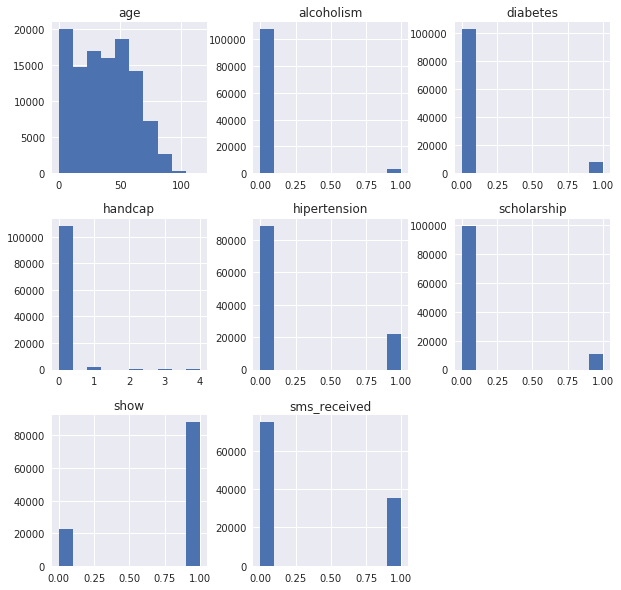

In [30]:
df.hist(figsize=(10,10));

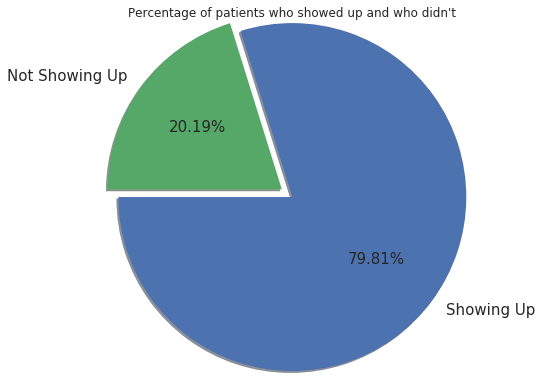

In [31]:
label_Names = ["Showing Up", "Not Showing Up"]
data = [df.query('show == 1').count()[0], df.query('show == 0').count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=2,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.3);

### Research Question 1  ( which gender shows up for thier appointment?)

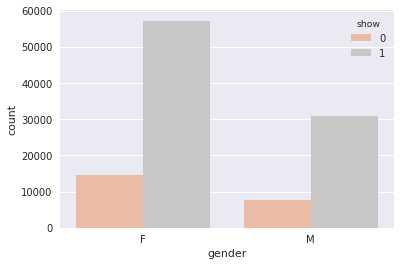

In [32]:
fig=sns.countplot(x='gender', data=df, hue='show', palette='RdGy')

In [33]:
male_total= df.query('gender == "M" ')['gender'].count()
male_total

38685

In [34]:
male_miss=df.query('gender == "M" and show ==0 ')['gender'].count()
male_miss

7723

In [35]:
male_absent_ratio=(male_miss/male_total) *100
male_absent_ratio

19.963810262375599

In [36]:
female_total= df.query('gender == "F" ')['gender'].count()
female_miss=df.query('gender == "F" and show ==0 ')['gender'].count()
female_absent_ratio=(female_miss/female_total) *100
female_absent_ratio

20.311542958962082

In [37]:
male_to_all_ratio=male_total/df['gender'].count()
male_to_all_ratio

0.35002397734367224

- the precentage of male and female whose missed show up almost are the same.

### Research Question 2  ( Is any disease affect showing up for thier appointment?)

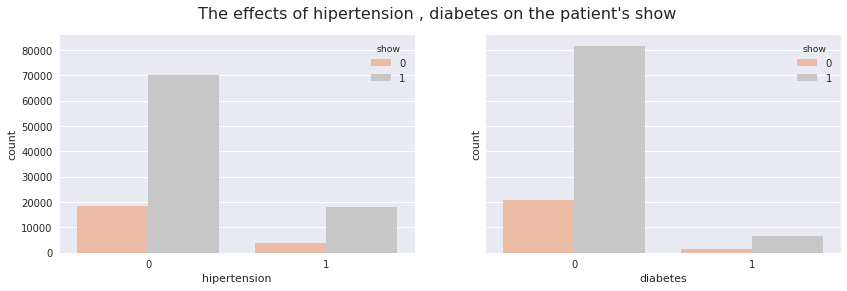

In [38]:
fig, (ax1, ax2 )= plt.subplots(ncols=2, sharey=True)
sns.countplot(x='hipertension', data=df, hue='show', ax=ax1, palette='RdGy')
sns.countplot(x='diabetes', data=df, hue='show', ax=ax2, palette='RdGy')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The effects of hipertension , diabetes on the patient's show", fontsize=16);

- hipertension , diabetes do not affect paitents show up.

### Research Question 3  ( Is Alcoholism, Handcap degree and Scholarship affect showing up for thier appointment?)

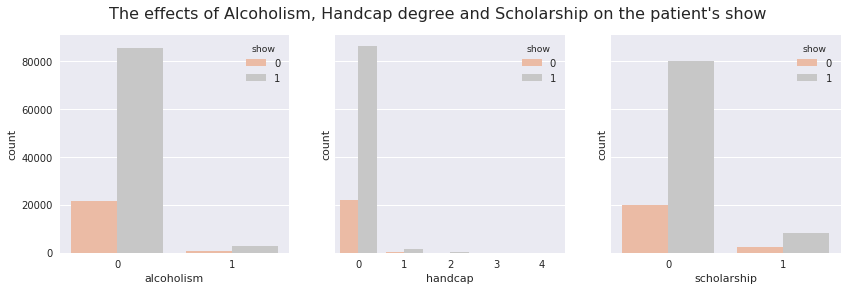

In [39]:
fig, (ax1, ax2 ,ax3)= plt.subplots(ncols=3, sharey=True)
sns.countplot(x='alcoholism', data=df, hue='show', ax=ax1, palette='RdGy')
sns.countplot(x='handcap', data=df, hue='show', ax=ax2, palette='RdGy')
sns.countplot(x='scholarship', data=df, hue='show', ax=ax3, palette='RdGy')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The effects of Alcoholism, Handcap degree and Scholarship on the patient's show", fontsize=16);

- Alcoholism, Handcap degree and Scholarship do not affect paitents show up.

### Research Question 4  ( Is reciving SMS- message affect showing up for thier appointment?)

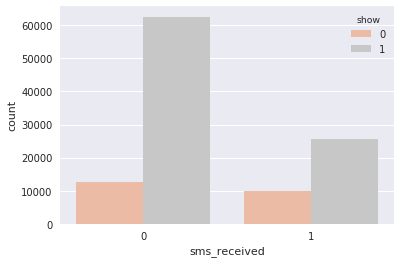

In [40]:
fig=sns.countplot(x='sms_received', data=df, hue='show', palette='RdGy')

- reciving SMS- message does not affect paitents show up.

### Research Question 5  ( Is appointment month/day/hour affect showing up for thier appointment?)

In [41]:
df['appointment_day'].dt.hour

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
110491    0
110492    0
110493    0
110494    0
110495    0
110496    0
110497    0
110498    0
110499    0
110500    0
110501    0
110502    0
110503    0
110504    0
110505    0
110506    0
110507    0
110508    0
110509    0
110510    0
110511    0
110512    0
110513    0
110514    0
110515    0
110516    0
110517    0
110518    0
110519    0
110520    0
Name: appointment_day, Length: 110521, dtype: int64

- No hours in appointment date

In [42]:
df['appointment_dow']=df['appointment_day'].dt.day_name()
df['appointment_dow'].head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: appointment_dow, dtype: object

In [43]:
df['appointment_month']=df['appointment_day'].dt.month
df['appointment_month'].head()

0    4
1    4
2    4
3    4
4    4
Name: appointment_month, dtype: int64

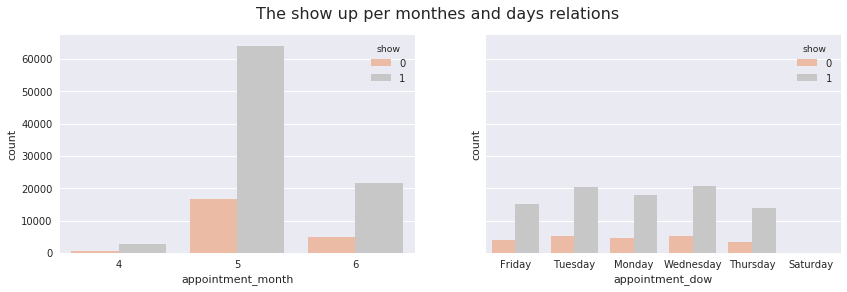

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='appointment_month', data=df, hue='show', ax=ax1, palette='RdGy')
sns.countplot(x='appointment_dow', data=df, hue='show', ax=ax2, palette='RdGy')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The show up per monthes and days relations", fontsize=16);

In [45]:
df['appointment_day'].min()

Timestamp('2016-04-29 00:00:00')

In [46]:
df['appointment_day'].max()

Timestamp('2016-06-08 00:00:00')

- May the highest month when patients make appointment , but data already collected from 2016/04/29 to 2016/06/08 so this chart does not give information in terms of the difference between the months
- Tuesday,Wednesday highest days when patients make appointment.
- Saturday the lowest ptients appoinmentday and no data on Sunday
- No hours in appointment date

### Research Question 6 ( what age range was most showing up for thier appointment?)

In [47]:
df.describe()['age']

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [48]:
bins=[df.describe()['age']['min'],df.describe()['age']['25%'],df.describe()['age']['50%'],df.describe()['age']['75%'],
     df.describe()['age']['max']]
bins_labels=['childs','young','middel-age','old']
age=pd.cut(df['age'],bins,labels=bins_labels)
age.name='age_level'
df_age=df.copy()
df_age['age_level']=age
df_age.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,appointment_dow,appointment_month,age_level
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,4,old
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,4,old
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,4,old
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,4,childs
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,4,old


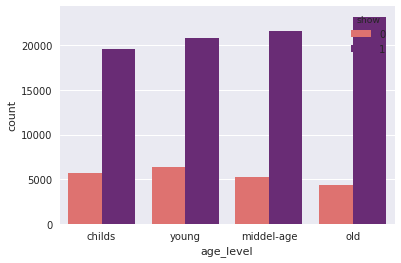

In [49]:
sns.countplot(x='age_level', data=df_age, hue='show', palette='magma_r');
fig.set_figwidth(25);
fig.set_figheight(10);

- young (18 to 37) years old are the highest missed showing up, and old (55 to 115) years old are the highest showing up

### Research Question 7 ( Is waiting days affect the patient's show?)

In [50]:
df['waitting_day']=df['appointment_day'].dt.date-df['scheduled_day'].dt.date
df['waitting_day'].describe()

count                     110521
mean     10 days 04:25:27.412889
std      15 days 06:07:25.262183
min              0 days 00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: waitting_day, dtype: object

In [51]:
df['waitting_day']=df['waitting_day'].dt.days

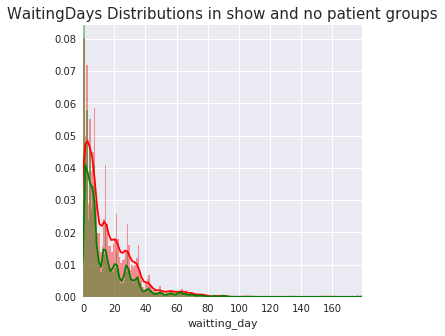

In [52]:
plt.figure(figsize=(5,5))

sns.distplot(df[df['show'] == 0]["waitting_day"], bins=df['waitting_day'].max(),color='red' ,kde=True)
sns.distplot(df[df['show'] == 1]["waitting_day"], bins=df['waitting_day'].max(), color='green', kde=True)

plt.title('WaitingDays Distributions in show and no patient groups', fontsize=15)
plt.xlim(df['waitting_day'].min(),df['waitting_day'].max())
plt.show();

- waiting days until 7 days patient show up is higher ratio after 7 days missed show up is higher ratio 

<a id='conclusions'></a>
## Conclusions

- Percentage of patients who show up on their appointments represents 70.81% and who Don't show up on their appointments represents 20.19%
- Both genders have same commitment to medical schedules. (near to 80 %)
- Sms doesn't affect on patient's show up.
- young from 18 to 39 years old are the highest missed show up
- Patients Who didn't show up have more than 7 days of waiting.
- Relation between wating days and show up is negative.

- The important factors affect patient show up are: hipertension and Age 

### limitations:

- Data is imbalanced because males represent 35% of observations.
- Data collected from 2016/04/29 to 2016/06/08 .
- some patients who marked as no show up, in real they may show up but on another day.
- Data must include time of sending sms to detect if sms send before appointment day with enough time or send after appointment day.


In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0